In [70]:
import numpy as np
import pandas as pd

In [28]:
data = pd.read_csv("datasets/house-prices.csv")

data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [29]:
x = data.values[:, 0:10]
y = data.values[:, 10]

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size = 0.3)

x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5)

In [32]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
  Dense(32, activation = "relu", input_shape = (10, )),
  Dense(32, activation = "relu"),
  Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "sgd", loss = "binary_crossentropy", metrics = ["accuracy"])

In [33]:
model_output = model.fit(x_train, y_train, epochs = 100, validation_data = (x_val, y_val))

Epoch 1/100


32/32 [==============================] - 1s 9ms/step - loss: 0.7035 - accuracy: 0.4990 - val_loss: 0.6900 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.4990 - val_loss: 0.6834 - val_accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.4980 - val_loss: 0.6780 - val_accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5029 - val_loss: 0.6733 - val_accuracy: 0.5708
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.6419 - val_loss: 0.6685 - val_accuracy: 0.7580
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.7270 - val_loss: 0.6636 - val_accuracy: 0.7808
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.7789 - val_loss: 0.6583 - val_accuracy: 0.8265
Epoch 8/100
32/32 [======

In [34]:
loss, accuracy = model.evaluate(x_test, y_test)

loss, accuracy

7/7 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8721


(0.2631695568561554, 0.8721461296081543)

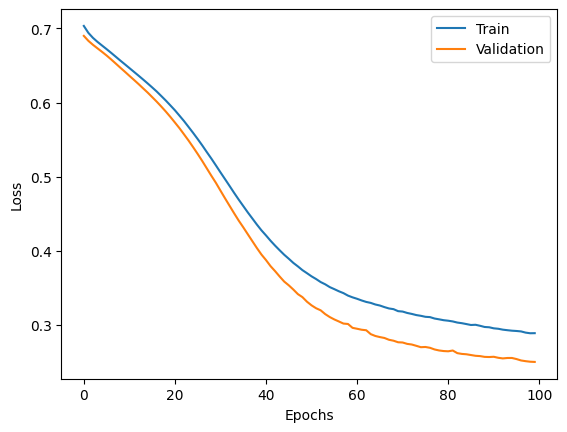

In [35]:
import matplotlib.pyplot as plt

plt.plot(model_output.history["loss"], label = "Train")
plt.plot(model_output.history["val_loss"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

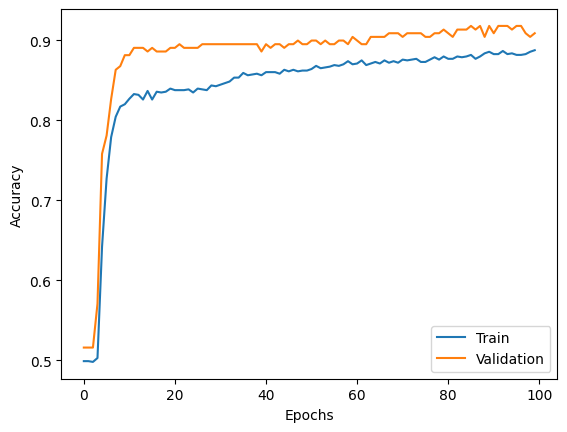

In [36]:
plt.plot(model_output.history["accuracy"], label = "Train")
plt.plot(model_output.history["val_accuracy"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Fabricate overfitting case

In [40]:
model = Sequential([
  Dense(1000, activation = "relu", input_shape = (10, )),
  Dense(1000, activation = "relu"),
  Dense(1000, activation = "relu"),
  Dense(1000, activation = "relu"),
  Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [41]:
model_output = model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data = (x_val, y_val))

Epoch 1/100
32/32 [==============================] - 5s 34ms/step - loss: 0.5055 - accuracy: 0.7769 - val_loss: 0.3169 - val_accuracy: 0.8767
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4130 - accuracy: 0.8405 - val_loss: 0.3643 - val_accuracy: 0.8265
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 0.3422 - accuracy: 0.8620 - val_loss: 0.3028 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 1s 34ms/step - loss: 0.3015 - accuracy: 0.8787 - val_loss: 0.2693 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 40ms/step - loss: 0.3151 - accuracy: 0.8738 - val_loss: 0.2457 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 46ms/step - loss: 0.2945 - accuracy: 0.8806 - val_loss: 0.2075 - val_accuracy: 0.9132
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2823 - accuracy: 0.8836 - val_loss: 0.2542 - val_accuracy: 0.9041
Epoch 

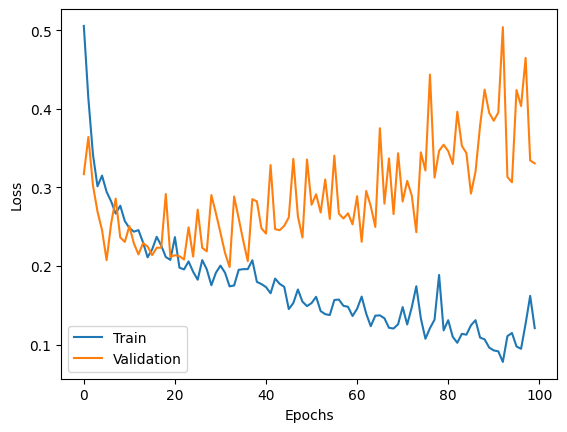

In [42]:
plt.plot(model_output.history["loss"], label = "Train")
plt.plot(model_output.history["val_loss"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

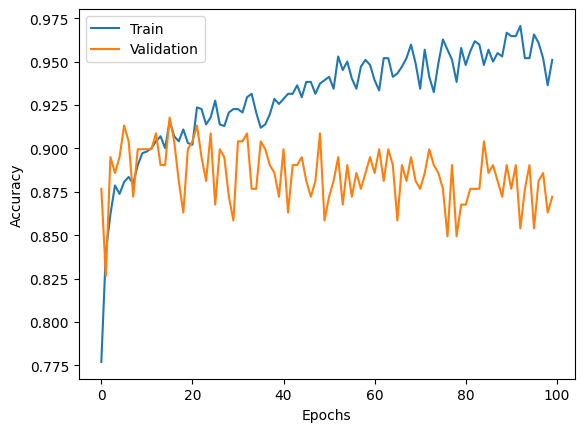

In [43]:
plt.plot(model_output.history["accuracy"], label = "Train")
plt.plot(model_output.history["val_accuracy"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
from keras import regularizers
from keras.layers import Dropout

model = Sequential([
  Dense(1000, activation = "relu", kernel_regularizer = regularizers.l2(0.01), input_shape = (10, )),
  Dropout(0.3),
  Dense(1000, activation = "relu", kernel_regularizer = regularizers.l2(0.01)),
  Dropout(0.3),
  Dense(1000, activation = "relu", kernel_regularizer = regularizers.l2(0.01)),
  Dropout(0.3),
  Dense(1000, activation = "relu", kernel_regularizer = regularizers.l2(0.01)),
  Dropout(0.3),
  Dense(1, activation = "sigmoid", kernel_regularizer = regularizers.l2(0.01))
])

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [45]:
model_output = model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data = (x_val, y_val))

Epoch 1/100
32/32 [==============================] - 6s 60ms/step - loss: 14.2520 - accuracy: 0.6184 - val_loss: 3.9022 - val_accuracy: 0.7215
Epoch 2/100
32/32 [==============================] - 1s 42ms/step - loss: 1.6865 - accuracy: 0.8102 - val_loss: 0.7911 - val_accuracy: 0.7489
Epoch 3/100
32/32 [==============================] - 1s 44ms/step - loss: 0.6370 - accuracy: 0.8288 - val_loss: 0.5874 - val_accuracy: 0.8174
Epoch 4/100
32/32 [==============================] - 2s 55ms/step - loss: 0.5481 - accuracy: 0.8444 - val_loss: 0.4742 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4989 - accuracy: 0.8689 - val_loss: 0.4758 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 42ms/step - loss: 0.5091 - accuracy: 0.8620 - val_loss: 0.4369 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 2s 51ms/step - loss: 0.4883 - accuracy: 0.8689 - val_loss: 0.4319 - val_accuracy: 0.9087
Epoch

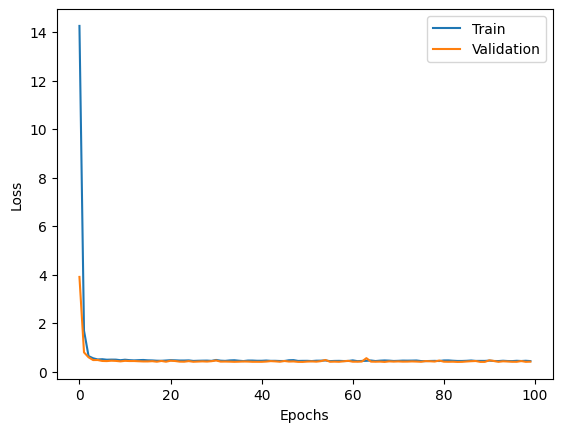

In [46]:
plt.plot(model_output.history["loss"], label = "Train")
plt.plot(model_output.history["val_loss"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

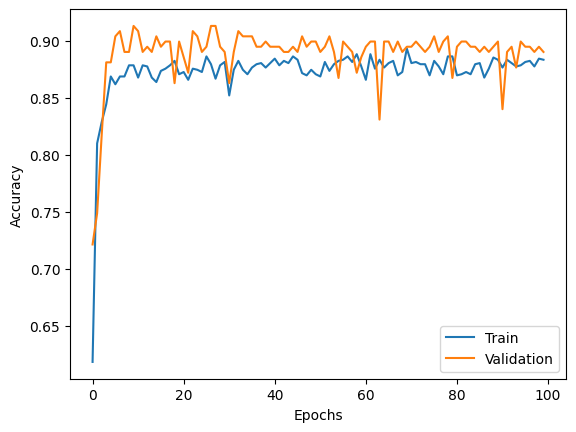

In [47]:
plt.plot(model_output.history["accuracy"], label = "Train")
plt.plot(model_output.history["val_accuracy"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
y_predict = model.predict(x_test)

y_predict = [1 if predict >= 0.5 else 0 for predict in y_predict]

7/7 [==============================] - 0s 17ms/step


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = precision_score(y_test, y_predict)
print(f"Precision: {accuracy}")

accuracy = recall_score(y_test, y_predict)
print(f"Recall: {accuracy}")

accuracy = f1_score(y_test, y_predict)
print(f"F1: {accuracy}")

Precision: 0.8487394957983193
Recall: 0.9181818181818182
F1: 0.8820960698689956


Text(50.722222222222214, 0.5, 'Predicted Label')

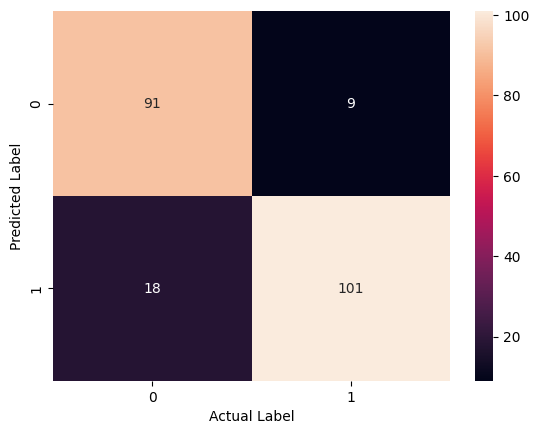

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf = confusion_matrix(y_predict, y_test)
sns.heatmap(cf, annot  = True, fmt = "d")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")

In [68]:
model.save("11-dumps/model.keras")

In [ ]:
from joblib import dump

dump(scaler, "11-dumps/scaler.pkl")

In [82]:
sample_data = np.array([
  [1000, 6, 6, 800, 2, 2, 3, 7, 1, 500]
])

In [83]:
from joblib import load

scaler = load("11-dumps/scaler.pkl")
sample_data = scaler.transform(sample_data)

In [84]:
from keras.models import load_model

model = load_model("11-dumps/model.keras")

y_predict = model.predict(sample_data)

y_predict = [1 if predict >= 0.5 else 0 for predict in y_predict]

y_predict

1/1 [==============================] - 0s 84ms/step


[1]